In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pylab as pl

# 1 Introduction to FITS

Flexible Image Transport System (FITS) is an open standard defining a digital file format useful for storage, transmission and processing of data: formatted as multi-dimensional arrays (for example a 2D image), or tables. FITS is the most commonly used digital file format in astronomy.

https://fits.gsfc.nasa.gov/
 
The astropy.io.fits package provides access to FITS files. 

https://docs.astropy.org/en/stable/io/fits/index.html

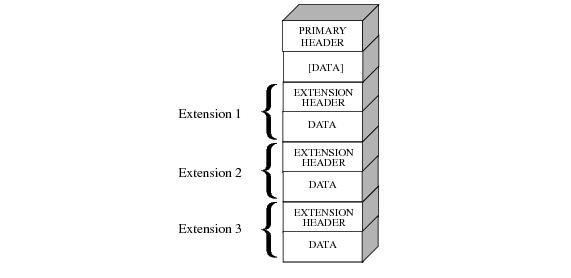

In [2]:
import astropy.io.fits as pyfits
hdu_list = pyfits.open('./HorseHead.fits')
hdu_list.info()
image_data = hdu_list[0].data
hdu_list.close()

Filename: ./HorseHead.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


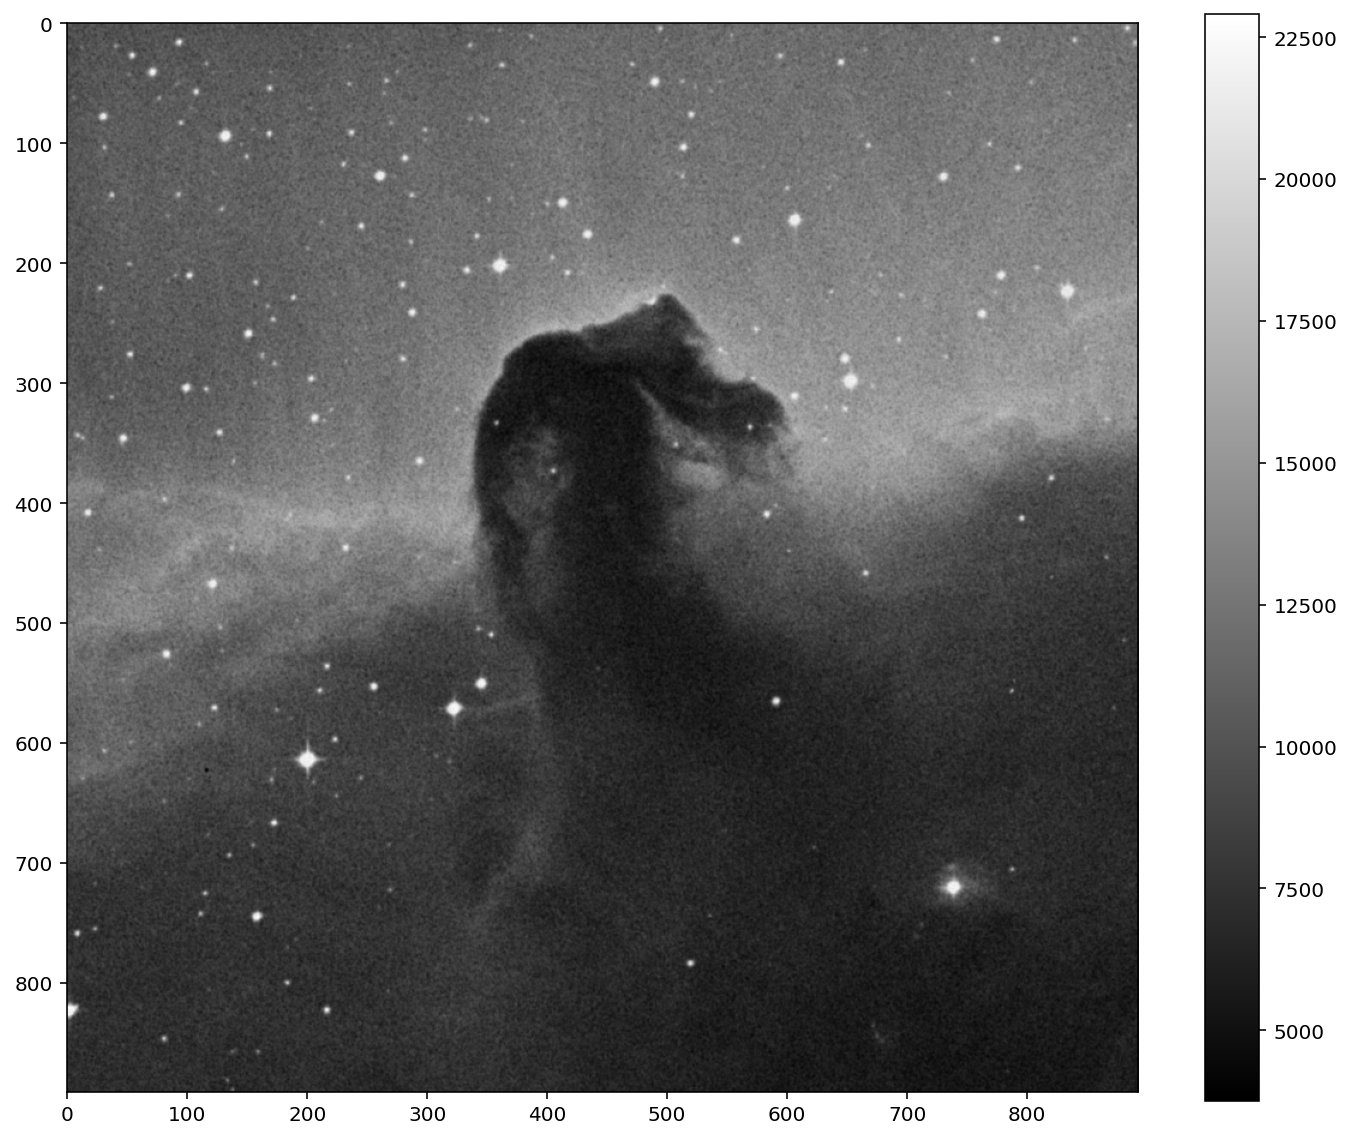

In [3]:
pl.figure(figsize=(12, 10))
pl.imshow(np.flipud(image_data.T), cmap='gray')
pl.colorbar()
pl.grid(False)

## 1.1 Create a FITS file

Types of Header Data Unit (HDU)
- Primary, the overall description of the FITS file
- BinTable, table data
- Image, image data
- And more...

In [4]:
# create an array
primary = np.arange(100.0)
# create an object of PrimaryHDU
primary_hdu = pyfits.PrimaryHDU(primary)
# create a list of objects for FITS
hdul = pyfits.HDUList([primary_hdu])

In [5]:
# create a table
col1 = pyfits.Column(name='a', array=np.array([1, 2]), format='D')
col2 = pyfits.Column(name='b', array=np.array([4, 5]), format='D')
col3 = pyfits.Column(name='c', array=np.array([7, 8]), format='D')
# create an object of BinTableHDU
table_hdu = pyfits.BinTableHDU.from_columns([col1, col2, col3])
# name the object
table_hdu.name = 'SCI_Table'

In [6]:
# create an image
image = np.ones((10, 10, 10))
# create an object of FITS ImageHDU
image_hdu = pyfits.ImageHDU(image)
# name the object
image_hdu.name='SCI_Image'

In [7]:
# create a list of HDU objects
hdul = pyfits.HDUList([primary_hdu, table_hdu, image_hdu])
# print the information of the HDU list
hdul.info()

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       5   (100,)   float64   
  1  SCI_TABLE     1 BinTableHDU     15   2R x 3C   ['D', 'D', 'D']   
  2  SCI_IMAGE     1 ImageHDU         9   (10, 10, 10)   float64   


## 1.2 Updating the information in a FITS file

In [8]:
# create a new image
image_new = np.zeros((123, 123))
# update the new image to the current HDU
hdul[2].data = image_new
# print the information of the HDU list
hdul.info()

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       5   (100,)   float64   
  1  SCI_TABLE     1 BinTableHDU     15   2R x 3C   ['D', 'D', 'D']   
  2  SCI_IMAGE     1 ImageHDU         8   (123, 123)   float64   


In [9]:
# create a new image
image1 = np.ones((100, 100))
# create an object of ImageHDU
image1_hdu = pyfits.ImageHDU(image1)
# add the new object to the end of the HDU list
hdul.append(image1_hdu)
# print the information of the updated HDU list
hdul.info()

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       5   (100,)   float64   
  1  SCI_TABLE     1 BinTableHDU     15   2R x 3C   ['D', 'D', 'D']   
  2  SCI_IMAGE     1 ImageHDU         8   (123, 123)   float64   
  3                1 ImageHDU         7   (100, 100)   float64   


In [10]:
# create an object of HDU header
hdr = pyfits.Header()
# assign values to the header
hdr['OBSERVER'] = 'Edwin Hubble'
hdr['COMMENT'] = "Here's some commentary about this FITS file."
# create an object of PrimaryHDU
empty_primary = pyfits.PrimaryHDU(header=hdr)
# insert the new PrimaryHDU to the beginning of the HDU list
hdul.insert(0, empty_primary)
# print the information of the HDU list
hdul.info()

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1                1 ImageHDU         6   (100,)   float64   
  2  SCI_TABLE     1 BinTableHDU     15   2R x 3C   ['D', 'D', 'D']   
  3  SCI_IMAGE     1 ImageHDU         8   (123, 123)   float64   
  4                1 ImageHDU         7   (100, 100)   float64   


## 1.3 Saving a FITS file

In [11]:
# save a HDU to a FITS file
primary_hdu.writeto('test0.fits')
image_hdu.writeto('image0.fits', overwrite=True)
# save HDU list to a FITS file
hdul.writeto('test3.fits', overwrite=True)

OSError: File 'test0.fits' already exists.

`pyfits.writeto(filename, data, header=None, output_verify='exception', overwrite=False, checksum=False)`

## 1.4 Read a FITS file

In [12]:
dataFile='test3.fits'
hdul = pyfits.open(dataFile)
hdul.info()
table_header = hdul[2].header
table_data = hdul[2].data
hdul.close()

Filename: test3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1                1 ImageHDU         6   (100,)   float64   
  2  SCI_TABLE     1 BinTableHDU     15   2R x 3C   [D, D, D]   
  3  SCI_IMAGE     1 ImageHDU         8   (123, 123)   float64   
  4                1 ImageHDU         7   (100, 100)   float64   


In [13]:
# print header of the table
print(table_header)

XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                   24 / length of dimension 1                          NAXIS2  =                    2 / length of dimension 2                          PCOUNT  =                    0 / number of group parameters                     GCOUNT  =                    1 / number of groups                               TFIELDS =                    3 / number of table fields                         TTYPE1  = 'a       '                                                            TFORM1  = 'D       '                                                            TTYPE2  = 'b       '                                                            TFORM2  = 'D       '                                                            TTYPE3  = 'c       '                    

In [14]:
# print data of the table
print(table_data)

[(1., 4., 7.) (2., 5., 8.)]


In [15]:
# list keys of the table
print(table_data.columns)

ColDefs(
    name = 'a'; format = 'D'
    name = 'b'; format = 'D'
    name = 'c'; format = 'D'
)


In [16]:
# list keys of the table (short version)
print(table_data.names)

['a', 'b', 'c']


### * try the functions below if you want

- astropy.io.fits.getval()
- astropy.io.fits.getdata()
- astropy.io.fits.getheader()

# 1.5 An Example for Playing with FITS File

OM10 is mock lens catalog which present the statistical properties the strongly lensed quasars in the upcoming large scale imaging surveys such as DES, LSST, and Euclid.

https://ui.adsabs.harvard.edu/abs/2010MNRAS.405.2579O/abstract
https://github.com/drphilmarshall/OM10

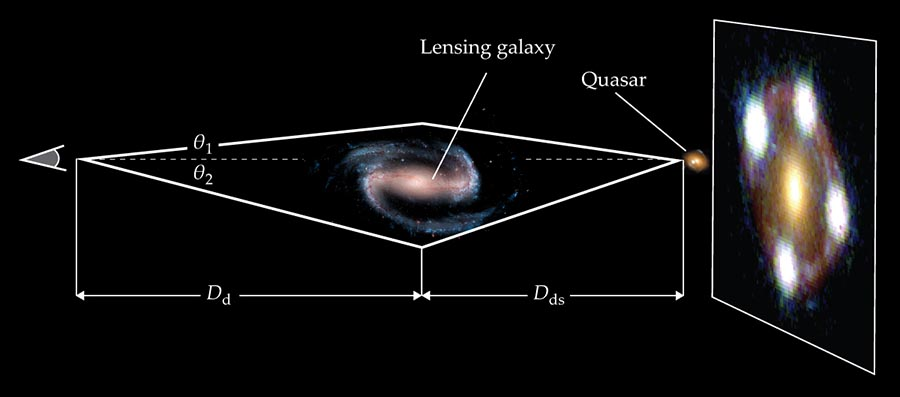

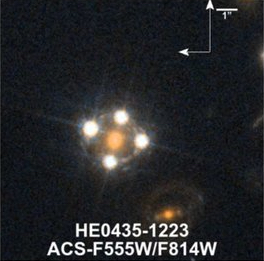

In [17]:
# open FITS file
dataFile='qso_mock.fits'
hdul = pyfits.open(dataFile)
hdul.info()

Filename: qso_mock.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     74   15658R x 33C   [J, I, I, D, D, D, D, D, D, D, D, D, D, D, D, 4D, 4D, 4D, 4D, 4D, 4D, D, D, D, D, D, D, D, D, D, D, D, D]   


In [18]:
# read header
lenses_header = hdul[1].header
print(lenses_header)

XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                  392 / length of dimension 1                          NAXIS2  =                15658 / length of dimension 2                          PCOUNT  =                    0 / number of group parameters                     GCOUNT  =                    1 / number of groups                               TFIELDS =                   33 / number of table fields                         TTYPE1  = 'LENSID  '                                                            TFORM1  = 'J       '                                                            TTYPE2  = 'FLAGTYPE'                                                            TFORM2  = 'I       '                                                            TTYPE3  = 'NIMG    '                    

In [19]:
# read data
lenses_data = hdul[1].data
print(lenses_data[0])

(14428, 0, 2, 0.062, 264.2409, 0.2182095, 86.19403, 0.04307117, -172.995, 4.01, -0.8669144, 0.2832836, 22.81, 22.94768, 3.858949, array([ 0.9541, -2.7414,  0.    ,  0.    ]), array([-0.2678,  0.8434,  0.    ,  0.    ]), array([-0.8809,  3.8125,  0.    ,  0.    ]), array([26.034,  0.   ,  0.   ,  0.   ]), array([0., 0., 0., 0.]), array([0., 0., 0., 0.]), 246.488327, 278.000397, -22.8653774, 14.4168491, 0.061999999, 1432.53, 1380.28, 0.0, 35956.6, 0.0, 0.0, 0.0)


In [20]:
print(lenses_data.columns)

ColDefs(
    name = 'LENSID'; format = 'J'
    name = 'FLAGTYPE'; format = 'I'
    name = 'NIMG'; format = 'I'
    name = 'ZLENS'; format = 'D'
    name = 'VELDISP'; format = 'D'
    name = 'ELLIP'; format = 'D'
    name = 'PHIE'; format = 'D'
    name = 'GAMMA'; format = 'D'
    name = 'PHIG'; format = 'D'
    name = 'ZSRC'; format = 'D'
    name = 'XSRC'; format = 'D'
    name = 'YSRC'; format = 'D'
    name = 'MAGI_IN'; format = 'D'
    name = 'MAGI'; format = 'D'
    name = 'IMSEP'; format = 'D'
    name = 'XIMG'; format = '4D'
    name = 'YIMG'; format = '4D'
    name = 'MAG'; format = '4D'
    name = 'DELAY'; format = '4D'
    name = 'KAPPA'; format = '4D'
    name = 'FSTAR'; format = '4D'
    name = 'DD'; format = 'D'
    name = 'DDLUM'; format = 'D'
    name = 'ABMAG_I'; format = 'D'
    name = 'APMAG_I'; format = 'D'
    name = 'KCORR'; format = 'D'
    name = 'DS'; format = 'D'
    name = 'DDS'; format = 'D'
    name = 'SIGCRIT'; format = 'D'
    name = 'DSLUM'; format = 'D'


In [21]:
print(lenses_data.names)

['LENSID', 'FLAGTYPE', 'NIMG', 'ZLENS', 'VELDISP', 'ELLIP', 'PHIE', 'GAMMA', 'PHIG', 'ZSRC', 'XSRC', 'YSRC', 'MAGI_IN', 'MAGI', 'IMSEP', 'XIMG', 'YIMG', 'MAG', 'DELAY', 'KAPPA', 'FSTAR', 'DD', 'DDLUM', 'ABMAG_I', 'APMAG_I', 'KCORR', 'DS', 'DDS', 'SIGCRIT', 'DSLUM', 'L_I', 'REFF', 'REFF_T']


In [22]:
hdul.close()

In [23]:
# another way to open FITS file
with pyfits.open(dataFile) as hdul:
    hdul = pyfits.open(dataFile)
    lenses_data = hdul[1].data
    lenses_keys = hdul[1].header

Text(0.5, 0, '$\\sigma_v^2$ (km^2/s^2)')

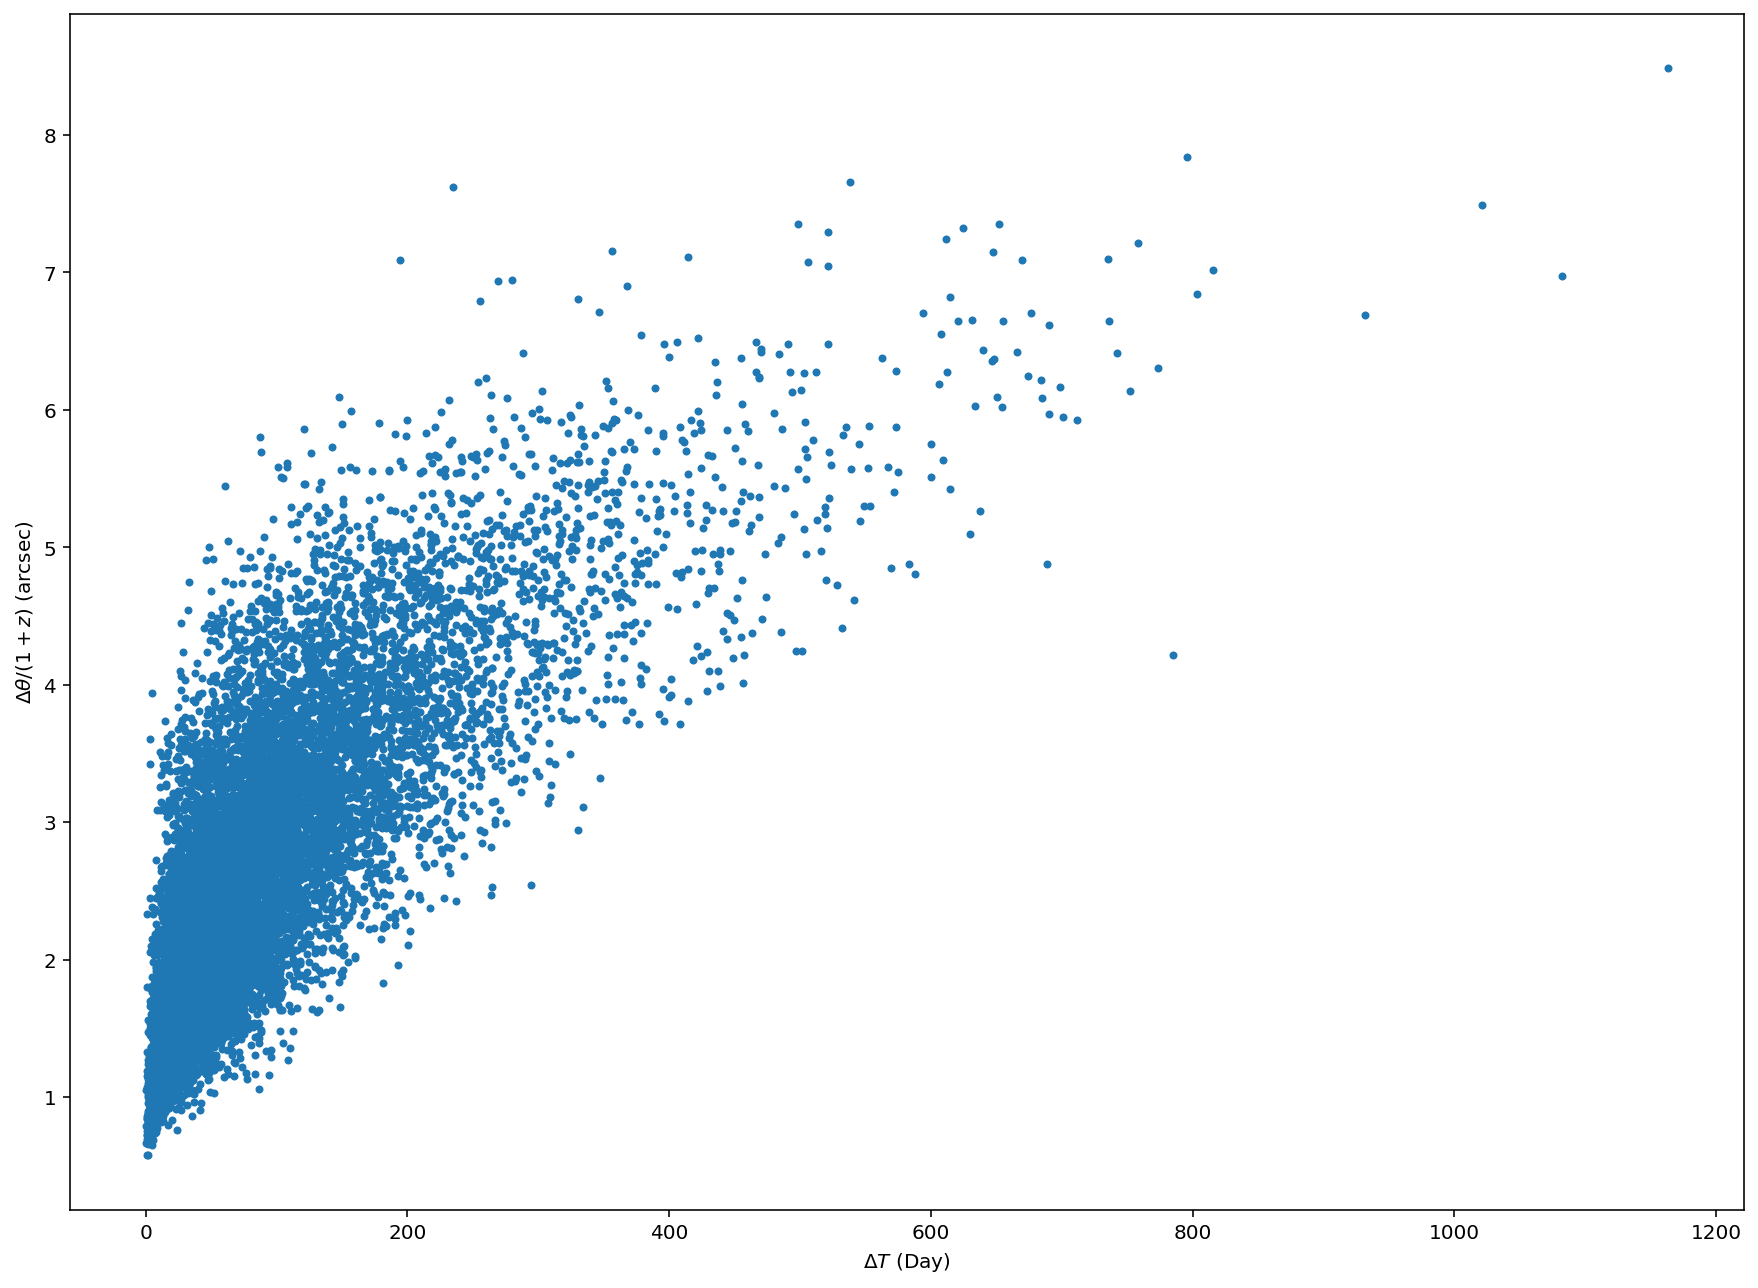

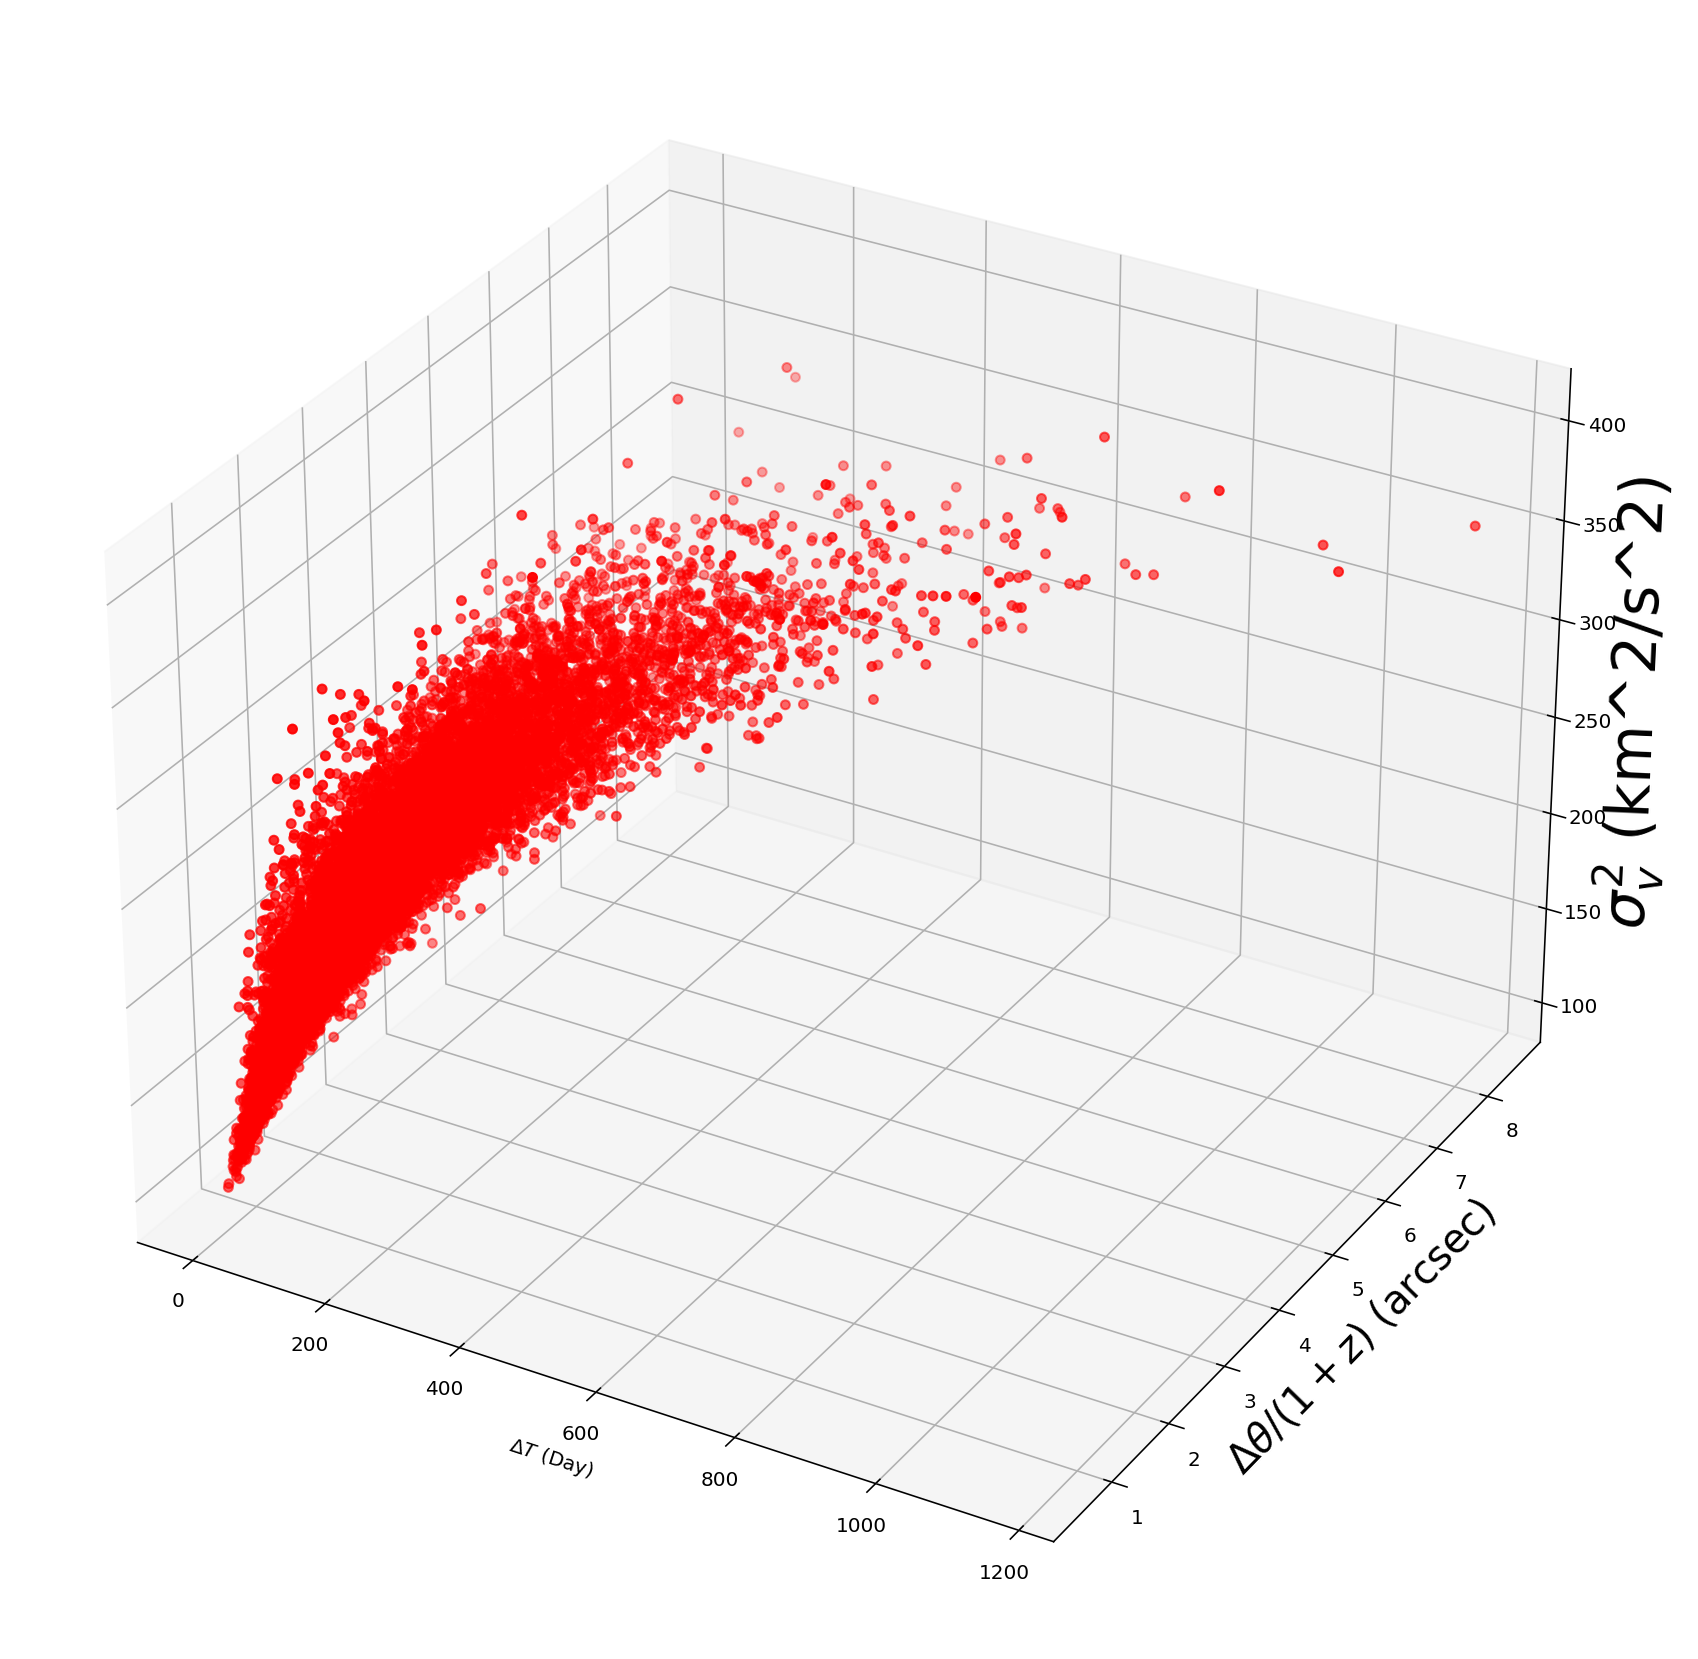

In [24]:
# plot data
OM10lenses = lenses_data
# choose double-images systems only 
idx = OM10lenses['NIMG']==2
# load in data
deltaT    = OM10lenses['DELAY'][idx].sum(axis=1)
deltaTheta= OM10lenses['IMSEP'][idx]*(OM10lenses['ZLENS'][idx]+1)
sigmaV    = OM10lenses['VELDISP'][idx]
# 2d plot
pl.figure(figsize=(15, 11))
pl.plot(deltaT, deltaTheta, '.')
pl.xlabel(r'$\Delta T$ (Day)')
pl.ylabel(r'$\Delta \theta / (1 + z)$ (arcsec)')
# 3d plot
from mpl_toolkits.mplot3d import Axes3D
fig = pl.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(deltaT, deltaTheta, sigmaV, marker='o', c='red')
ax.set_xlabel(r'$\Delta T$ (Day)', fontsize=10, rotation=150)
ax.set_ylabel(r'$\Delta \theta / (1 + z)$ (arcsec)', fontsize=20, rotation=100)
ax.set_zlabel(r'$\sigma_v^2$ (km^2/s^2)', fontsize=30, rotation=60)

In [25]:
# create a function for plotting
def plotPDF(PTYPE='ZLENS'):
    pl.figure(figsize=(12,8))
    pl.title(PTYPE, fontsize=18)
    pl.hist(OM10lenses[PTYPE], label='OM10')
    pl.xlabel('Redshift', fontsize=18)
    pl.ylabel('PDF', fontsize=18)
    pl.legend(fontsize=18)
    return True

True

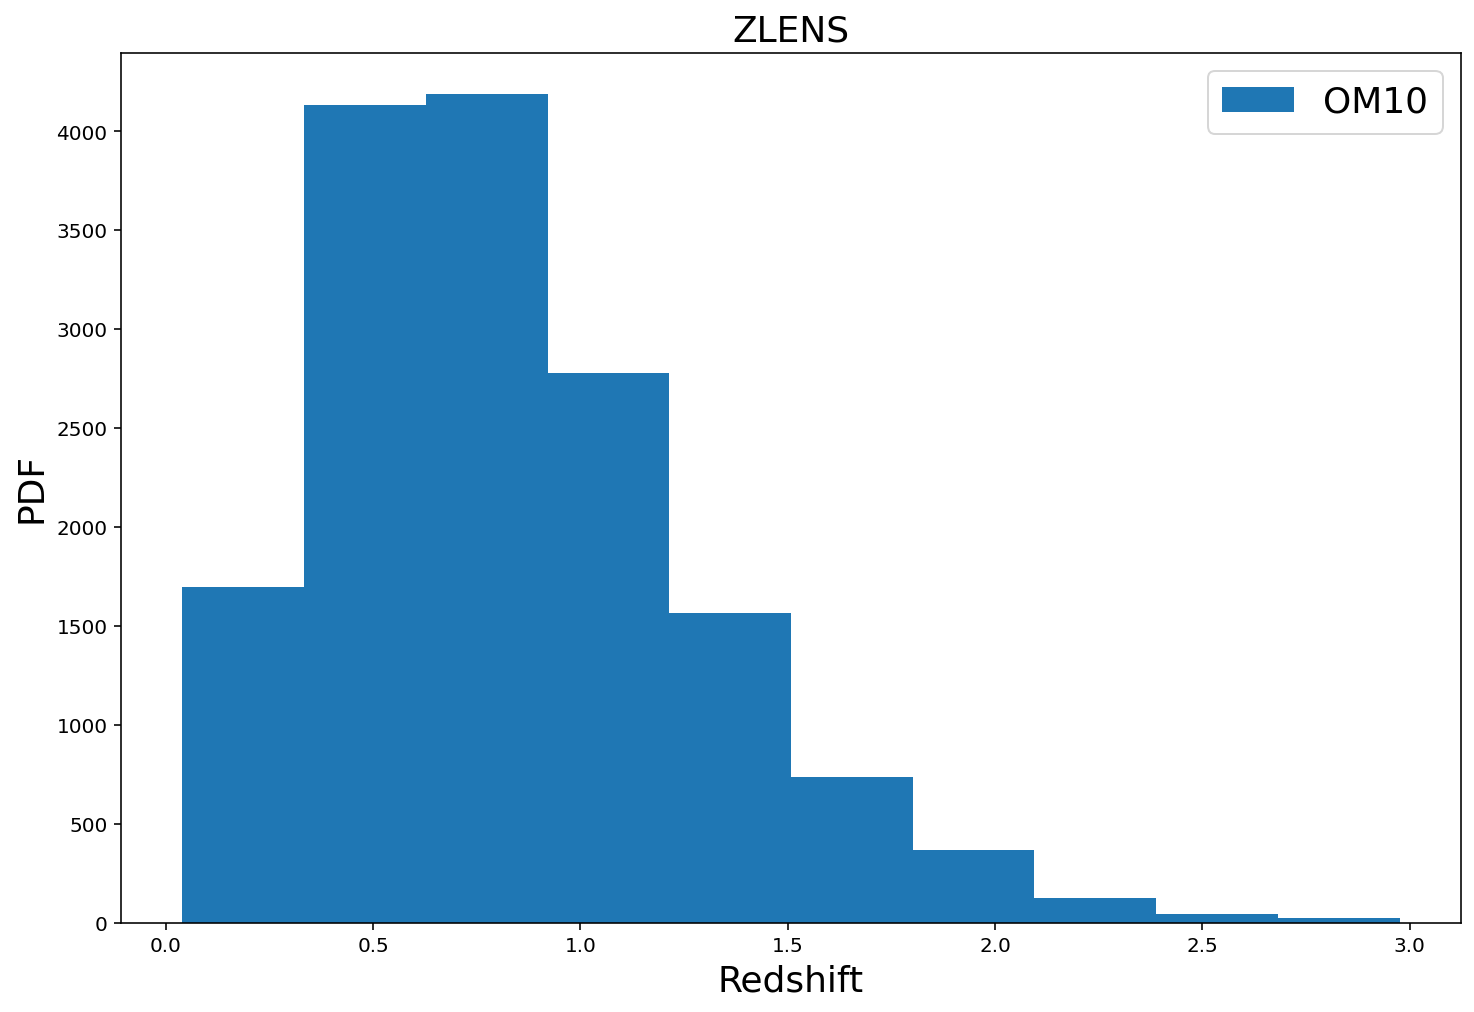

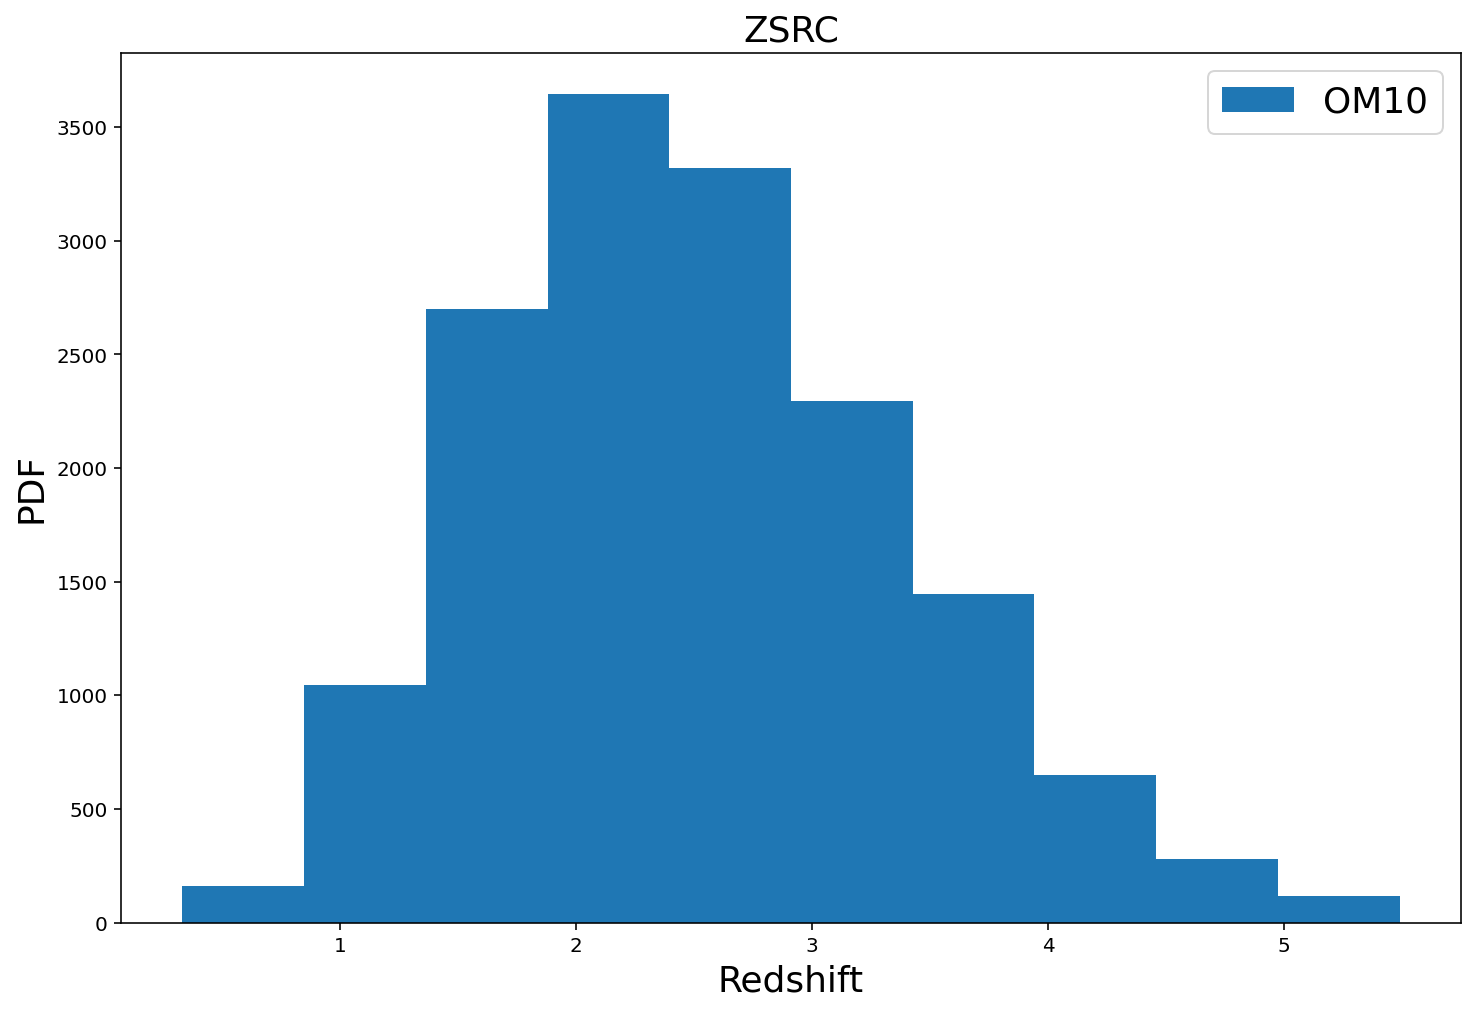

In [26]:
# plot redshifts of lenses and sources separately
plotPDF()
plotPDF('ZSRC')

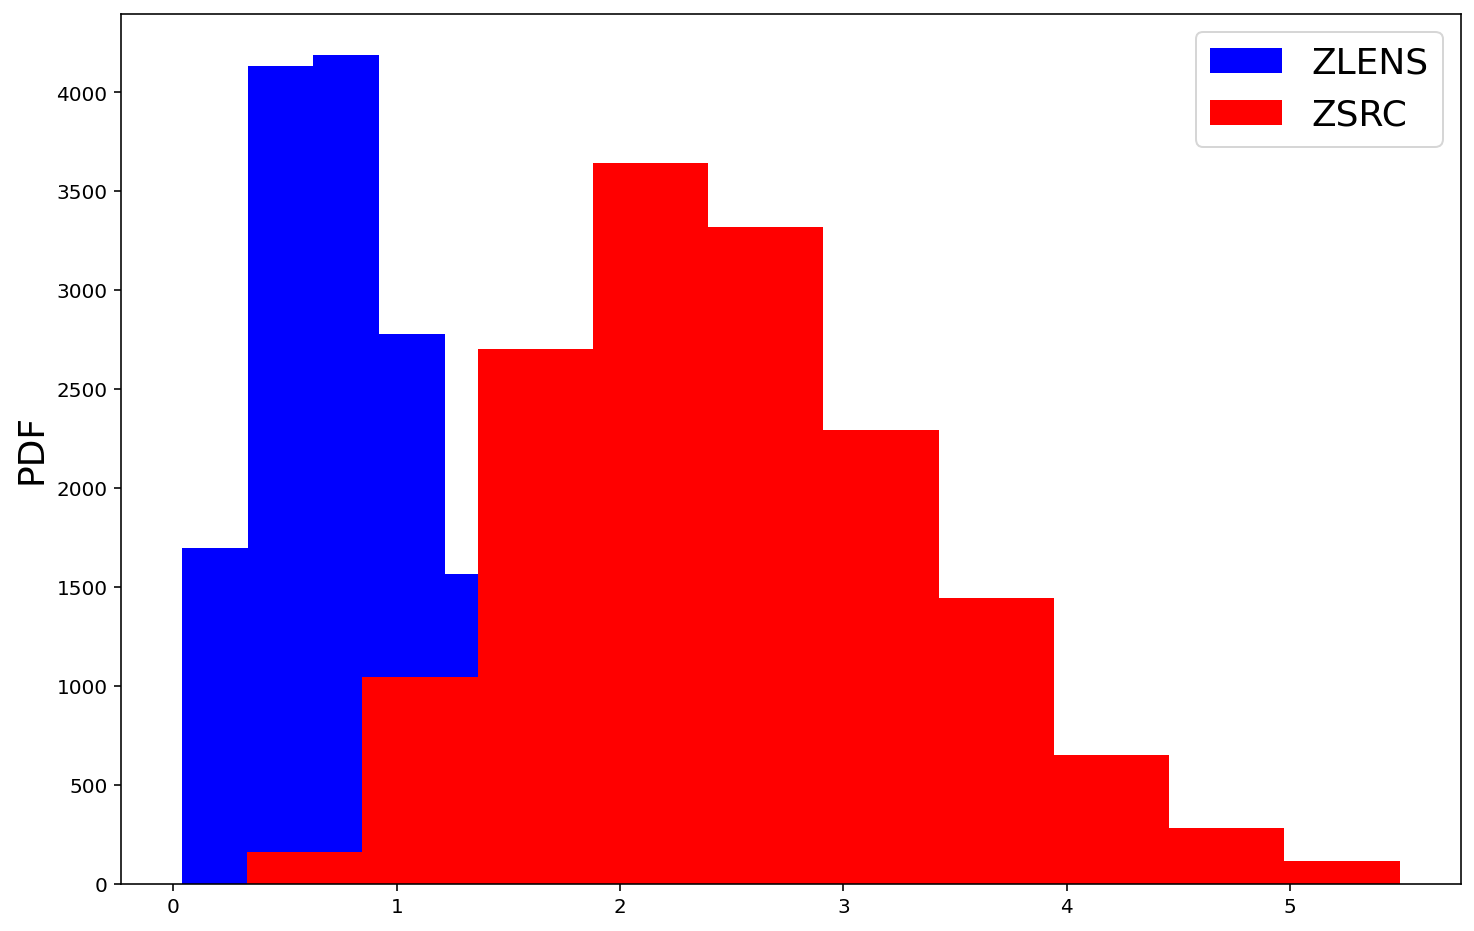

In [27]:
# plot redshifts of lenses and sources simultaneously
pl.figure(figsize=(12,8))
pl.hist(OM10lenses['ZLENS'], label='ZLENS', color='b')
pl.hist(OM10lenses['ZSRC'], label='ZSRC', color='r')
pl.ylabel('Redshift', fontsize=18)
pl.ylabel('PDF', fontsize=18)
pl.legend(fontsize=18)

### Visualize a single system

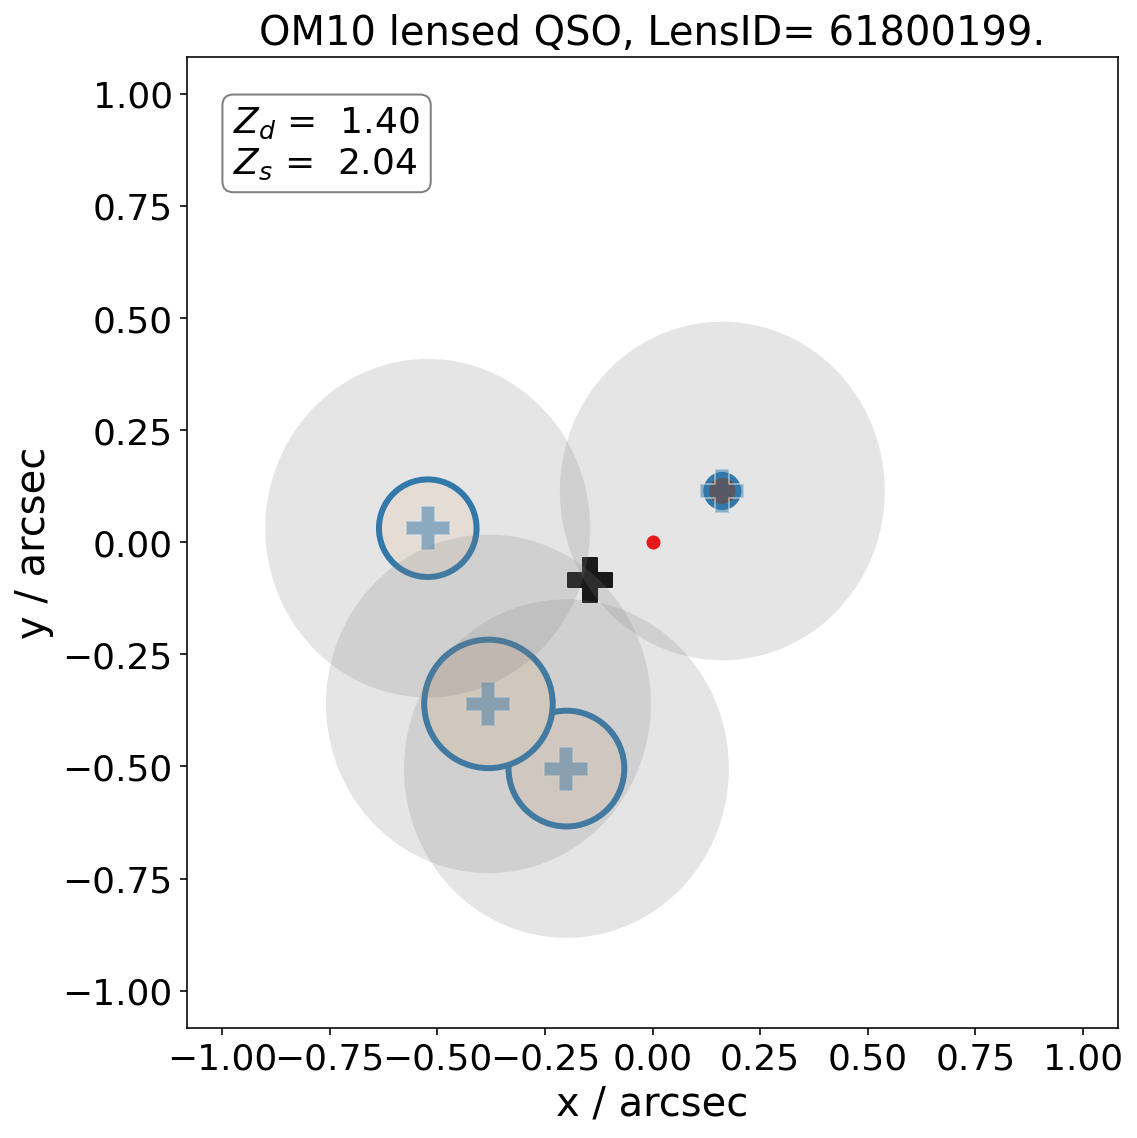

In [28]:
#----------------------------------------------------------------------
# choose a system
#
lensData = lenses_data
lensIndex = 1234

#----------------------------------------------------------------------
# extract parameters
#
lid  = lensData['LENSID'][lensIndex]
zl   = lensData['ZLENS'][lensIndex]                 # redshift of the lens
zs   = lensData['ZSRC'][lensIndex]                  # redshift of the source
imgSep=lensData['IMSEP'][lensIndex]

bsz_arc = imgSep*3.0
#----------------------------------------------------------------------
# draw title
#
pl.figure(figsize=(8, 8))
pl.title("OM10 lensed QSO, LensID= %d."%(lid),fontsize=20)

#-------------------------------------------------------
# plot source
#
ys1 = lensData['XSRC'][lensIndex]
ys2 = lensData['YSRC'][lensIndex]
pl.scatter(ys1, ys2, color='k', marker='P', s=500)        

#-------------------------------------------------------
# plot lensed images
#
ximg1 = lensData['XIMG'][lensIndex][:]
ximg2 = lensData['YIMG'][lensIndex][:]
magfs = lensData['MAG'][lensIndex][:]
delay = lensData['DELAY'][lensIndex][:]
pl.scatter(ximg1, ximg2, 
           s=np.abs(magfs)*500, c=delay, cmap=pl.cm.Oranges, 
           marker='o', edgecolor='C0', linewidth=3)
pl.scatter(ximg1, ximg2, color='C0', marker='P', linewidths=1, edgecolors='w', 
           s=500, alpha=0.5, )
pl.scatter([0], [0], color='red', marker='o')

#-------------------------------------------------------
# plot Seeing
#
FWHM_I = 0.754780 # arcsec, FWHM in i band of LSST
if bsz_arc > FWHM_I:
#         cir = pl.Circle((ys1,ys2), radius=FWHM_I*0.5, alpha=0.2, fc='grey')
    for xig1, xig2 in zip(ximg1, ximg2):
        cir = pl.Circle((xig1,xig2), radius=FWHM_I*0.5, alpha=0.2, fc='grey')
        pl.gca().add_patch(cir)
#-------------------------------------------------------
# add texts
#
textstr = '\n'.join((r"$Z_d$ = %5.2f" % zl, r"$Z_s$ = %5.2f" % zs))
props = {'boxstyle':'round', 'facecolor':'w', 'alpha':0.5}
pl.text(-bsz_arc*0.5*0.9, bsz_arc*0.5*0.9, textstr, fontsize=18, 
        verticalalignment='top', bbox=props)

#-------------------------------------------------------
# setup plots
#
pl.xlabel("x / arcsec",fontsize=20)
pl.ylabel("y / arcsec",fontsize=20)
pl.xlim(-bsz_arc/2.0, bsz_arc/2.0)
pl.ylim(-bsz_arc/2.0, bsz_arc/2.0)
pl.xticks(fontsize=18, rotation=0)
pl.yticks(fontsize=18, rotation=0)
pl.tight_layout()

### * Make plots with pandas and seaborn
- Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language. https://pandas.pydata.org/
- Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. https://seaborn.pydata.org/

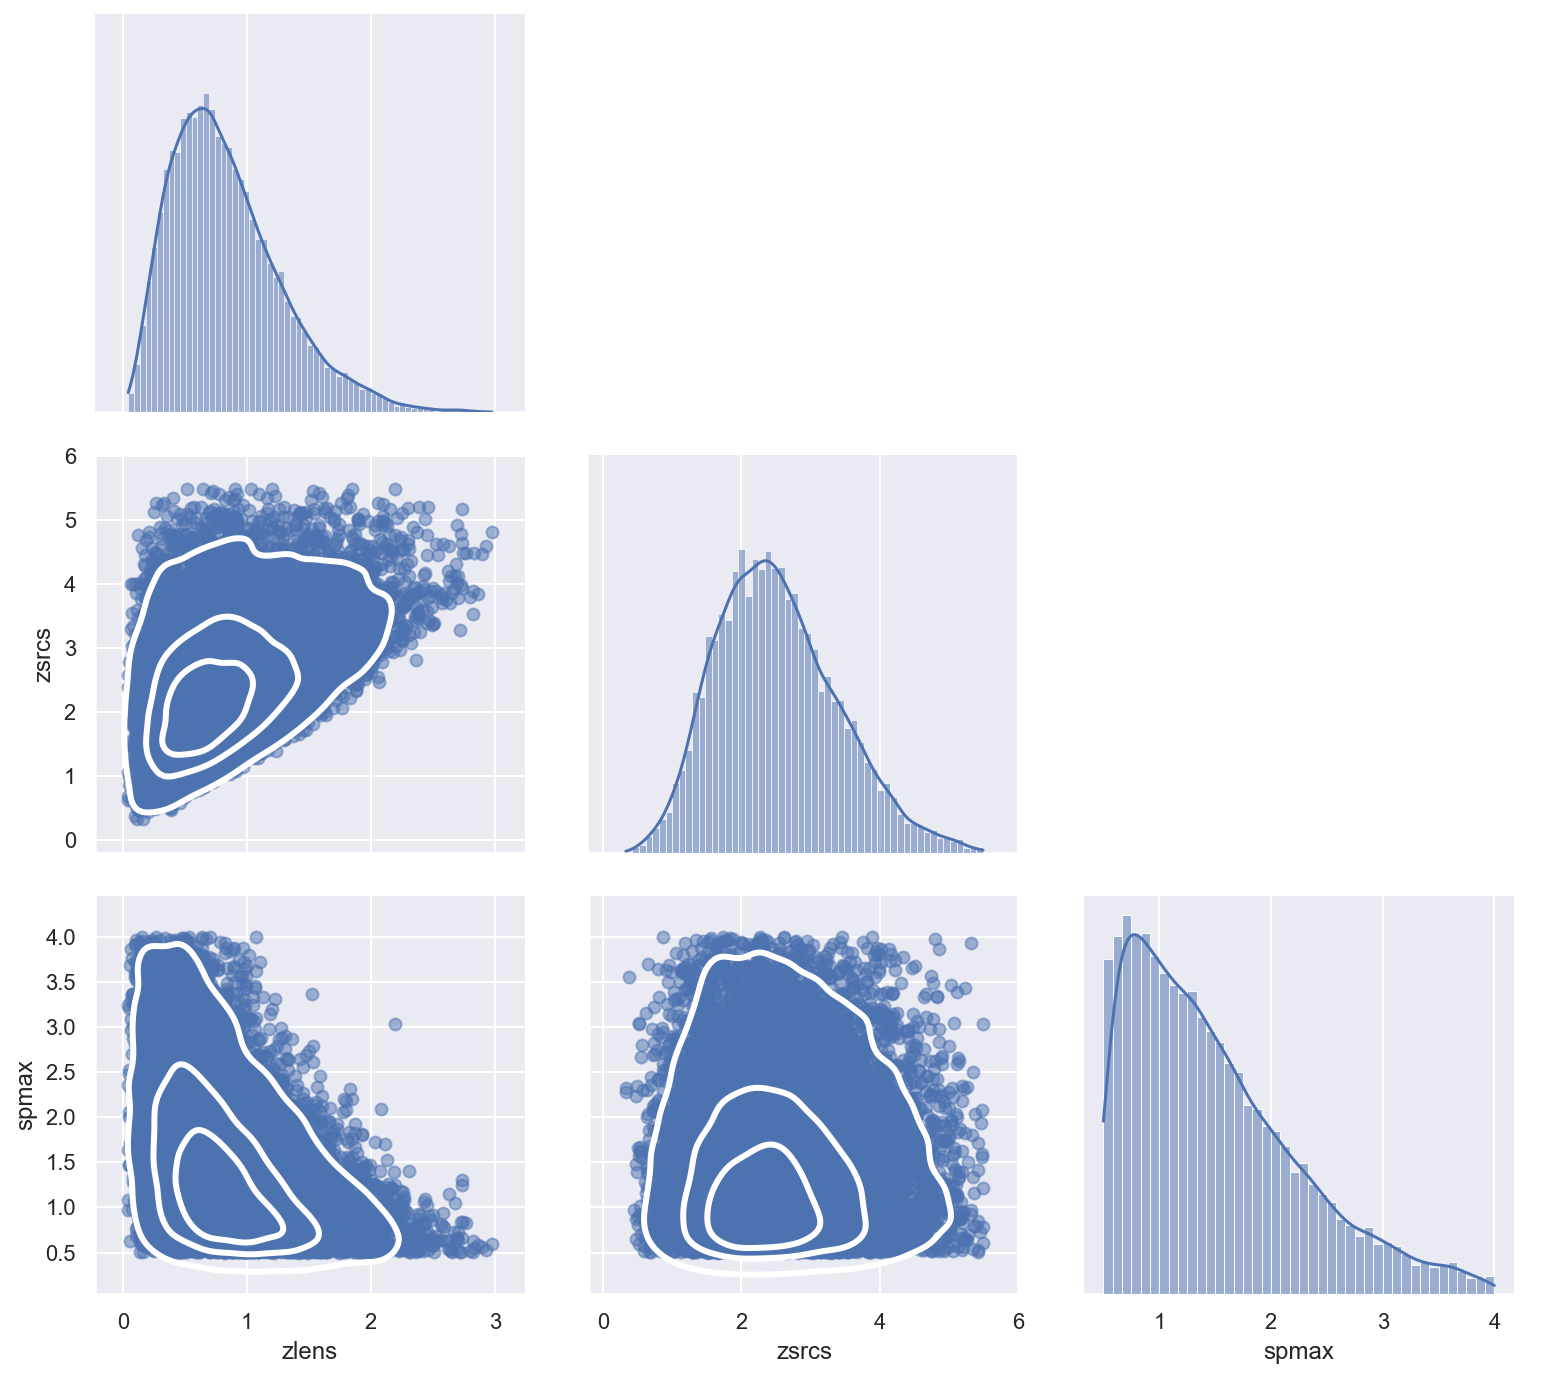

In [29]:
import pandas as pd
import seaborn as sns;sns.set()
# convert FITs table to Pandas DataFrame
data_om10 = {}
data_om10['zlens'] = lenses_data['ZLENS'].byteswap().newbyteorder()
data_om10['zsrcs'] = lenses_data['ZSRC'].byteswap().newbyteorder()
data_om10['spmax'] = lenses_data['IMSEP'].byteswap().newbyteorder()
df_om10 = pd.DataFrame(data=data_om10)
# # load data from pandas csv files directly
# df_om10 = pd.read_csv('./qso_mock_sub.csv')
# make a corner plot with Seaborn
pg = sns.PairGrid(df_om10, corner=True, vars=('zlens', 'zsrcs', 'spmax'))
pg.fig.set_size_inches(11,10)
pg.map_diag(sns.histplot, kde=True)
pg.map_lower(sns.kdeplot, linewidths=3, n_levels=4, colors=['w',])
pg.map_lower(pl.scatter, alpha=0.5)
pg.add_legend();

### * Hierarchical Data Format (HDF5)
Hierarchical Data Format (HDF) is a set of file formats (HDF4, HDF5) designed to store and organize large amounts of data. 
https://www.h5py.org/

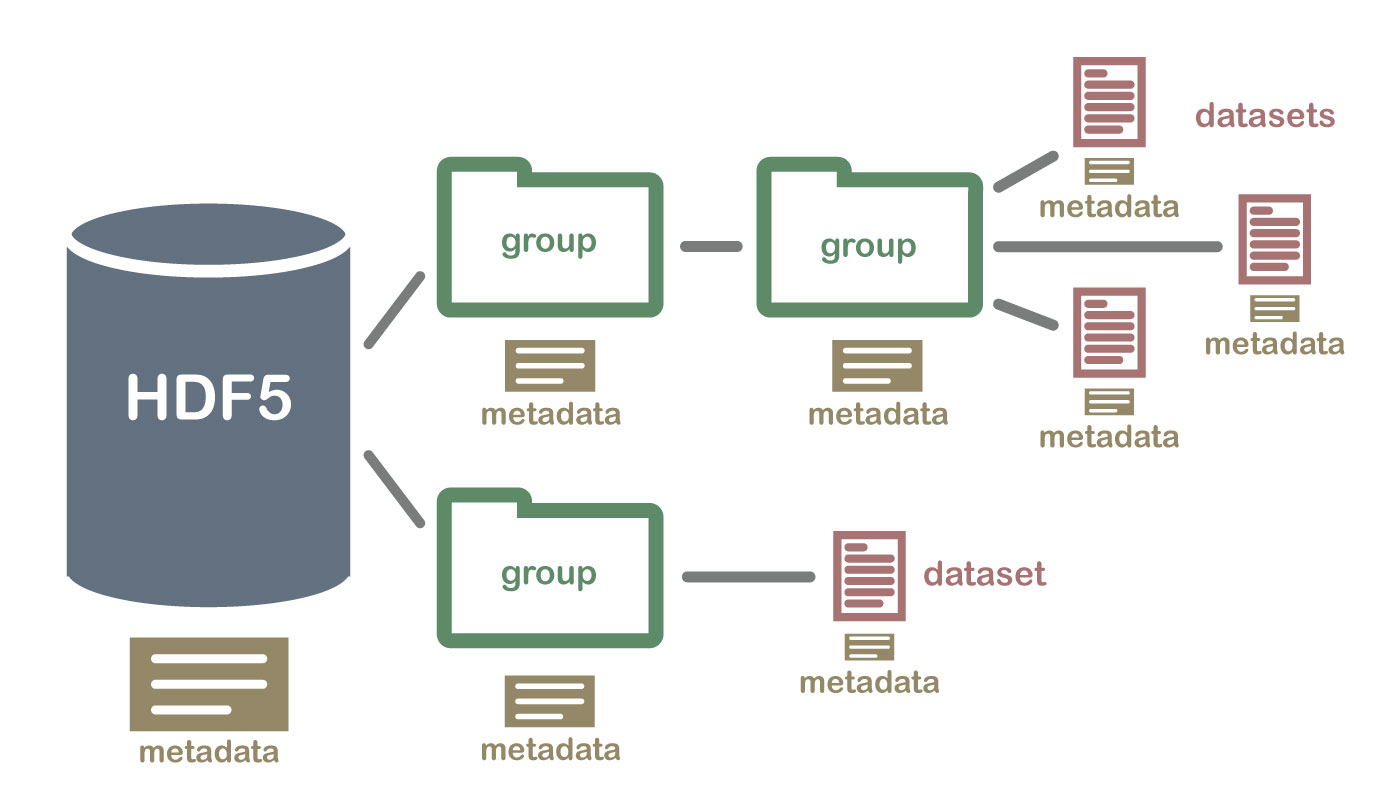

In [30]:
from astropy.table import Table
# dave an astropy Table to HDF5 File
lenses_hdf5 = Table(lenses_data)
lenses_hdf5.write('qso_mock_sub.hdf5', path='/lensCats', overwrite=True)
# load in an astropy Table from a HDF5 file
lenses_hdf5_new = Table.read('qso_mock_sub.hdf5', path='/lensCats')
print(lenses_hdf5_new.keys())
print(lenses_hdf5_new['ZLENS'])
# how to print the first 5 keys with their first 6 elements only?

['LENSID', 'FLAGTYPE', 'NIMG', 'ZLENS', 'VELDISP', 'ELLIP', 'PHIE', 'GAMMA', 'PHIG', 'ZSRC', 'XSRC', 'YSRC', 'MAGI_IN', 'MAGI', 'IMSEP', 'XIMG', 'YIMG', 'MAG', 'DELAY', 'KAPPA', 'FSTAR', 'DD', 'DDLUM', 'ABMAG_I', 'APMAG_I', 'KCORR', 'DS', 'DDS', 'SIGCRIT', 'DSLUM', 'L_I', 'REFF', 'REFF_T']
ZLENS
-----
0.062
0.072
0.082
0.084
0.096
0.114
0.128
  ...
2.008
2.038
 2.09
 2.18
2.358
2.464
 2.63
  2.7
Length = 15658 rows


### Python Packages for data processing in astronomy

- [x] FITS, https://docs.astropy.org/en/stable/io/fits/index.html
- \* Pandas, https://pandas.pydata.org/
- \* HDF5, https://www.h5py.org/
- \* Pickle, https://docs.python.org/3/library/pickle.html
- \* JSON, https://docs.python.org/3/library/json.html
- \* YAML, https://pyyaml.org/wiki/PyYAMLDocumentation

# 2 Other Python Packages for Astronomers

## 2.1 Astropy
Astropy is a Python library for use in astronomy. Learn Astropy provides a portal to all of the Astropy educational material through a single dynamically searchable web page. It allows you to filter tutorials by keywords, search for filters, and make search queries in tutorials and documentation simultaneously.

https://docs.astropy.org/en/stable/index.html

- Data structures and transformations
    - Constants (astropy.constants)
    - Units and Quantities (astropy.units)
    - N-Dimensional Datasets (astropy.nddata)
    - Data Tables (astropy.table)
    - Time and Dates (astropy.time)
    - Time Series (astropy.timeseries)
    - Astronomical Coordinate Systems (astropy.coordinates)
    - World Coordinate System (astropy.wcs)
    - Models and Fitting (astropy.modeling)
    - Uncertainties and Distributions (astropy.uncertainty)
- Files, I/O, and Communication
    - Unified File Read/Write Interface
    - FITS File Handling (astropy.io.fits)
    - ASCII Tables (astropy.io.ascii)
    - VOTable XML Handling (astropy.io.votable)
    - Miscellaneous: HDF5, YAML, ASDF, pickle (astropy.io.misc)
    - SAMP (Simple Application Messaging Protocol) (astropy.samp)
- Computations and utilities
    - Cosmological Calculations (astropy.cosmology)
    - Convolution and Filtering (astropy.convolution)
    - Data Visualization (astropy.visualization)
    - Astrostatistics Tools (astropy.stats)
- Nuts and bolts
    - Configuration System (astropy.config)
    - I/O Registry (astropy.io.registry)
    - Logging system
    - Python warnings system
    - Astropy Core Package Utilities (astropy.utils)
    - Astropy Glossary
    - Optional Packages’ Glossary

## 2.2 Healpy

HEALPix is an acronym for Hierarchical Equal Area isoLatitude Pixelation of a sphere. As suggested in the name, this pixelation produces a subdivision of a spherical surface in which each pixel covers the same surface area as every other pixel.

https://healpix.sourceforge.io/
https://github.com/healpy/healpy 

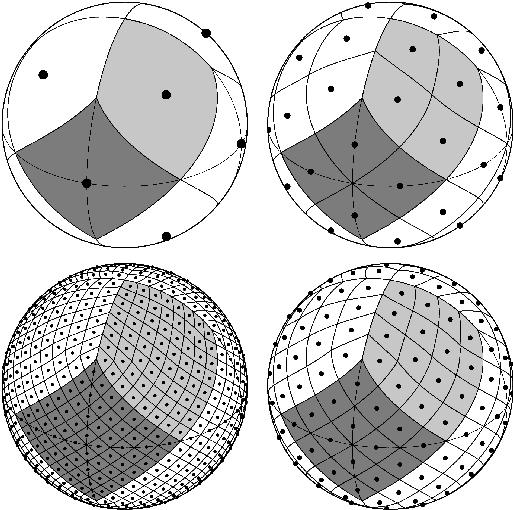

0.0 180.0 -180.0 180.0


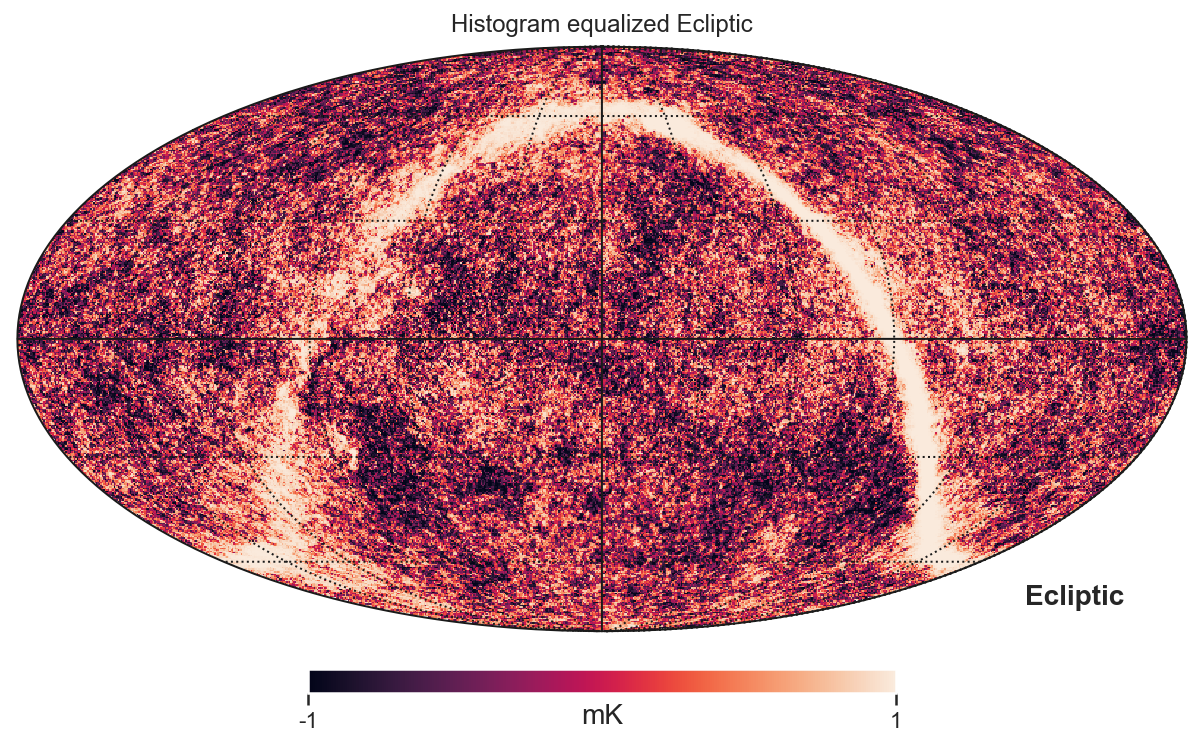

In [31]:
import healpy as hp

wmap_map_I = hp.read_map("wmap_band_iqumap_r9_7yr_W_v4.fits")
hp.mollview(
    wmap_map_I,
    coord=["G", "E"],
    title="Histogram equalized Ecliptic",
    unit="mK",
    norm="hist",
    min=-1,
    max=1,
)
hp.graticule()

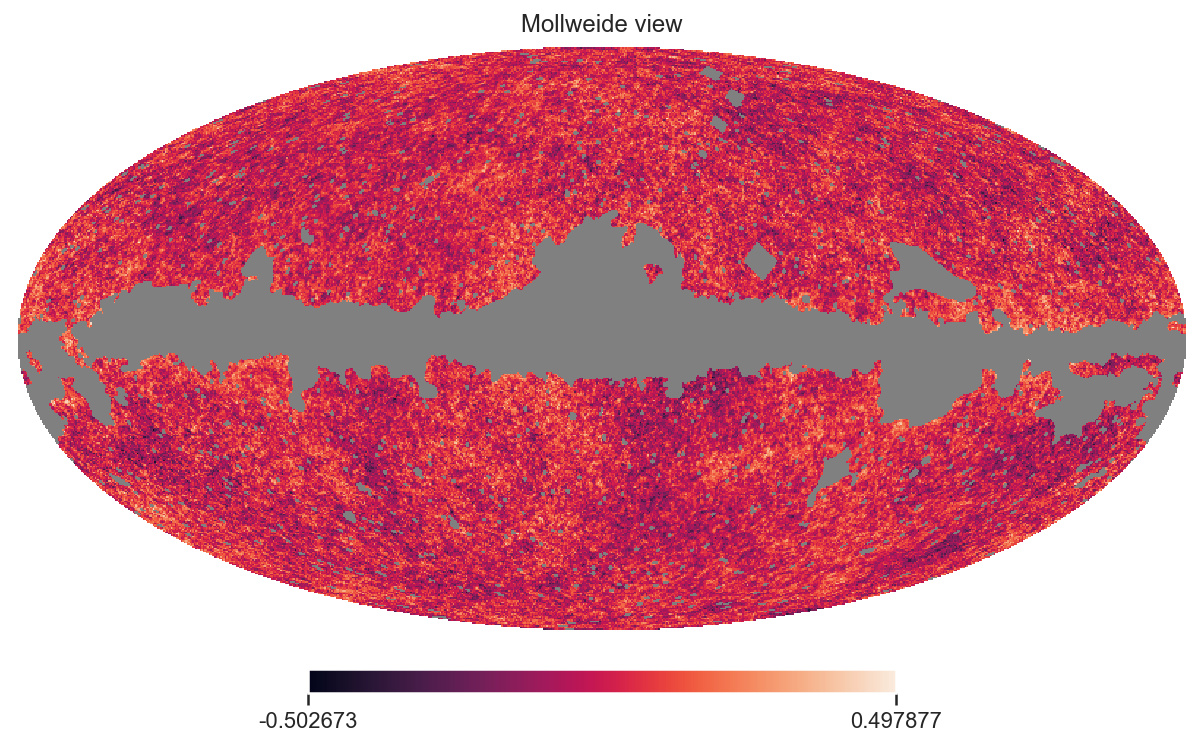

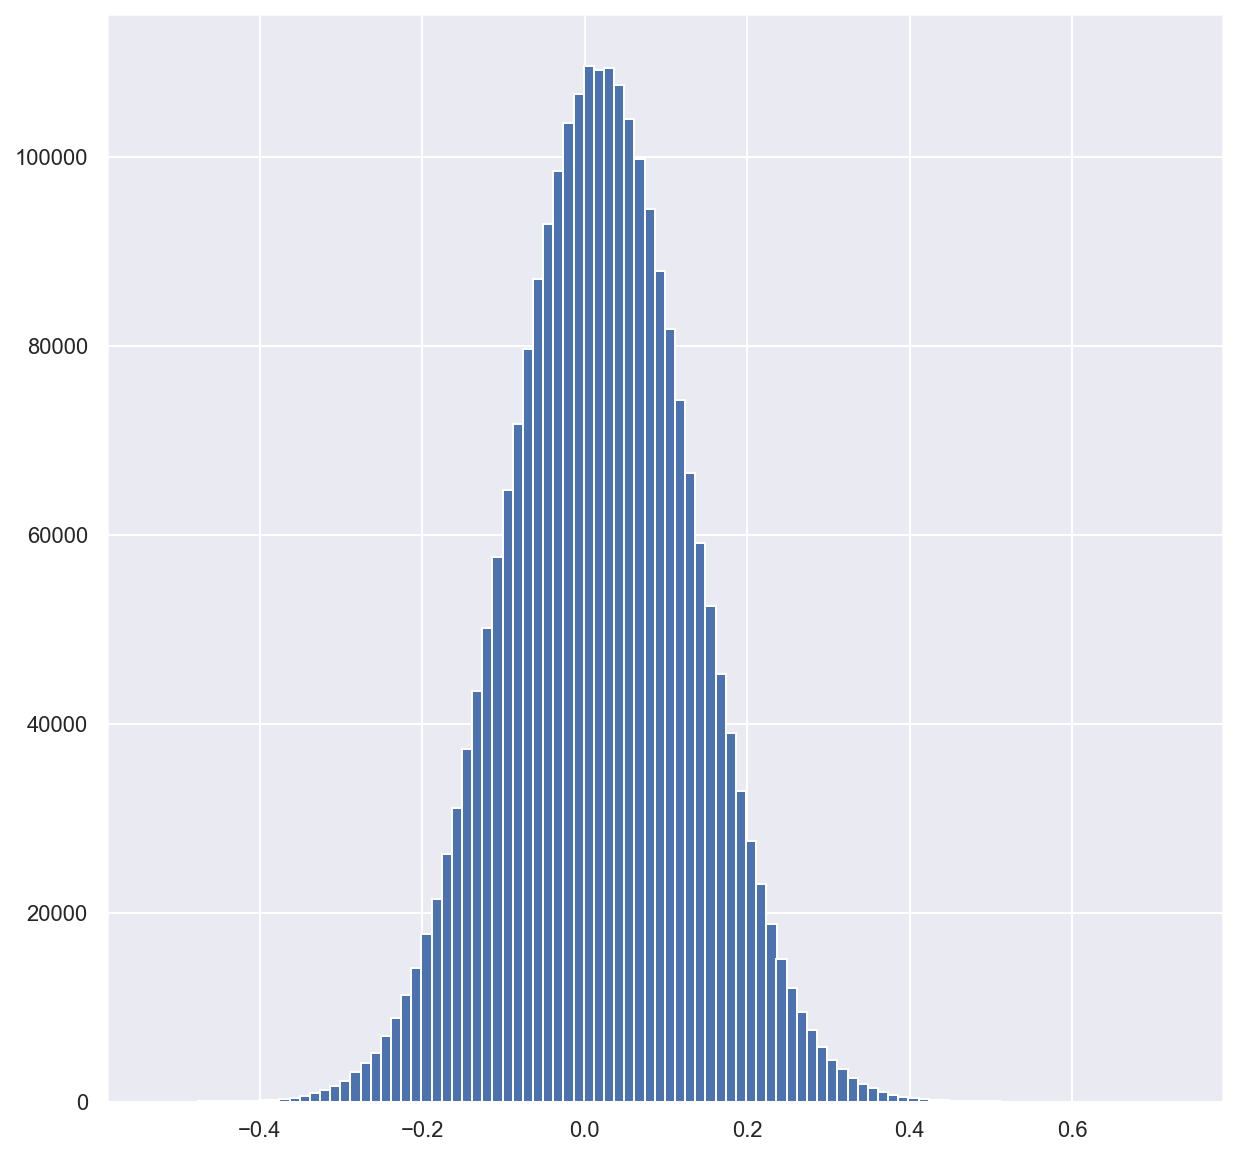

In [32]:
# plot masked CMB map
mask = hp.read_map("wmap_temperature_analysis_mask_r9_7yr_v4.fits").astype(np.bool_)
wmap_map_I_masked = hp.ma(wmap_map_I)
wmap_map_I_masked.mask = np.logical_not(mask)
hp.mollview(wmap_map_I_masked.filled())
# Probability Distribution of the pixel values in the masked CMB map
pl.figure(figsize=(10, 10))
pl.hist(wmap_map_I_masked.compressed(), bins=100);

## 2.3 EMCEE, Model Fitting
EMCEE is a stable, well tested Python implementation of the affine-invariant ensemble sampler for Markov chain Monte Carlo (MCMC) proposed by Goodman & Weare (2010). The code is open source and has already been used in several published projects in the Astrophysics literature.
https://emcee.readthedocs.io/en/stable/

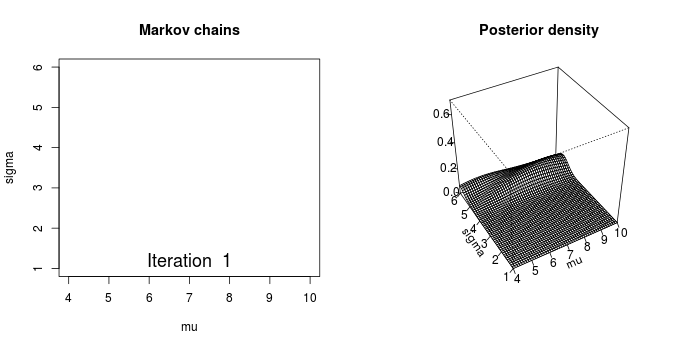

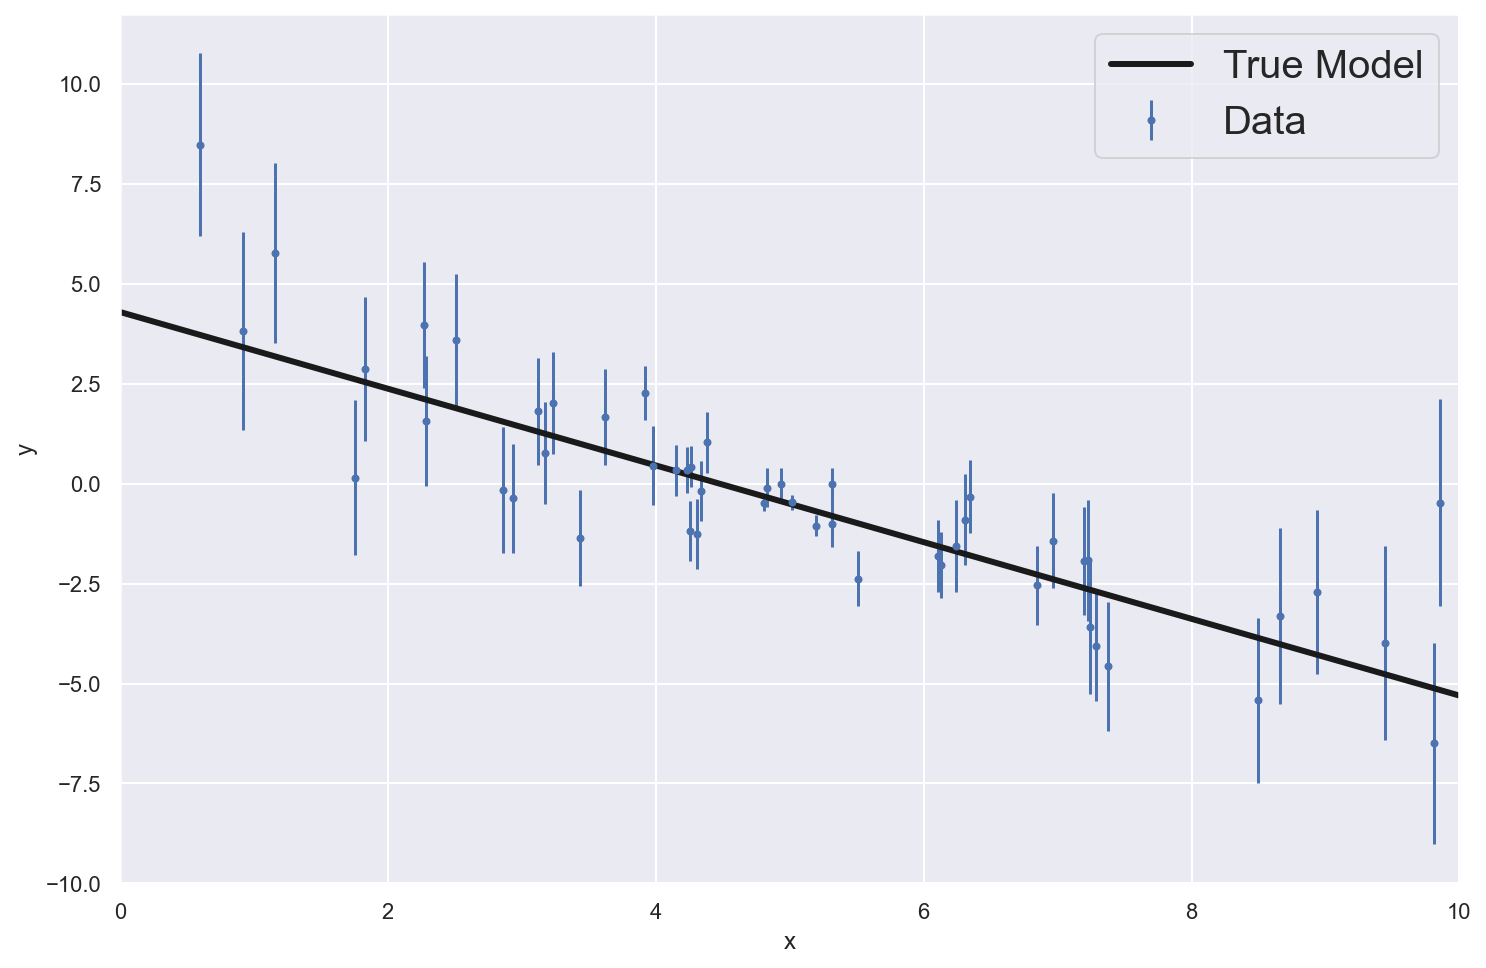

In [33]:
# create mock data
np.random.seed(123)

# Choose the "true" parameters.
m_true = -0.9594
b_true = 4.294

# Generate some synthetic data from the model.
N = 50
x = np.sort(10 * np.random.rand(N))
y = m_true * x + b_true
yerr = 0.1 + 0.5 * np.random.rand(N) + 0.5*np.abs(y-y.mean())
y += yerr*np.random.randn(N)


# visualize the mock data
pl.figure(figsize=(12, 8))
pl.errorbar(x, y, yerr=yerr, fmt=".C0", ecolor="C0", capsize=0, label="Data")
x0 = np.linspace(0, 10, 500)
pl.plot(x0, m_true * x0 + b_true, "k-", alpha=1.0, lw=3, label="True Model")
pl.xlim(0, 10)
pl.xlabel("x")
pl.ylabel("y")
pl.legend(fontsize=20)

In [34]:
# define likelihood function
def log_likelihood(theta, x, y, yerr):
    m, b = theta
    model = m * x + b
    sigma2 = yerr ** 2
    return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))

Maximum likelihood estimates:
m = -0.982, (m0 = -0.959})
b = 4.413, (b0 = 4.294})


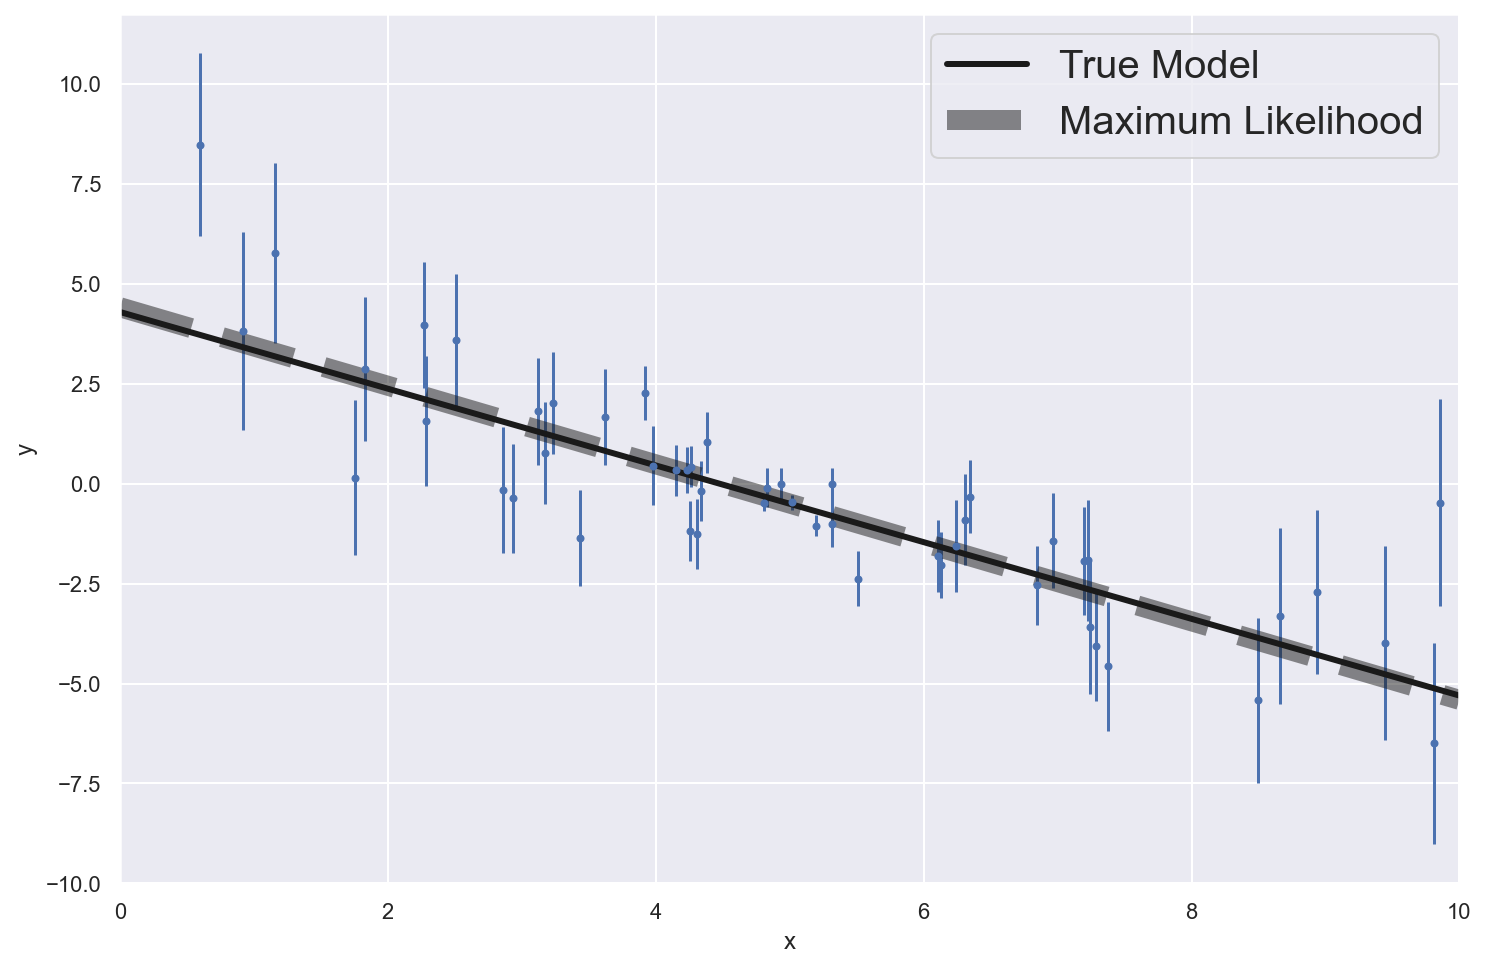

In [35]:
# fit the model using scipy
from scipy.optimize import minimize

np.random.seed(42)
nll = lambda *args: -log_likelihood(*args)
initial = np.array([m_true, b_true]) + 0.1 * np.random.randn(2)
soln = minimize(nll, initial, args=(x, y, yerr))
m_ml, b_ml = soln.x

print("Maximum likelihood estimates:")
print("m = %.3f, (m0 = %.3f})"%(m_ml, m_true))
print("b = %.3f, (b0 = %.3f})"%(b_ml, b_true))

# visualize the results
pl.figure(figsize=(12, 8))
pl.errorbar(x, y, yerr=yerr, fmt=".C0", ecolor="C0", capsize=0)
pl.plot(x0, m_true * x0 + b_true, "-k", lw=3, label="True Model")
pl.plot(x0, np.dot(np.vander(x0, 2), [m_ml, b_ml]), "--k", lw=10, alpha=0.5, label="Maximum Likelihood")
pl.xlim(0, 10)
pl.xlabel("x")
pl.ylabel("y");
pl.legend(fontsize=20)

In [36]:
# define priors of the parameters
def log_prior(theta):
    m, b = theta
    if -5.0 < m < 0.5 and 0.0 < b < 10.0:
        return 0.0
    return -np.inf

In [37]:
# define the full probability function of the system
def log_probability(theta, x, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, yerr)

In [38]:
# run the process of Monte Carlo Markov Chain (MCMC)
import emcee

pos = soln.x + 1e-4 * np.random.randn(32, 2)
nwalkers, ndim = pos.shape
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x, y, yerr))
sampler.run_mcmc(pos, 1000, progress=True);

100%|█████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1160.71it/s]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

-0.9594 4.294


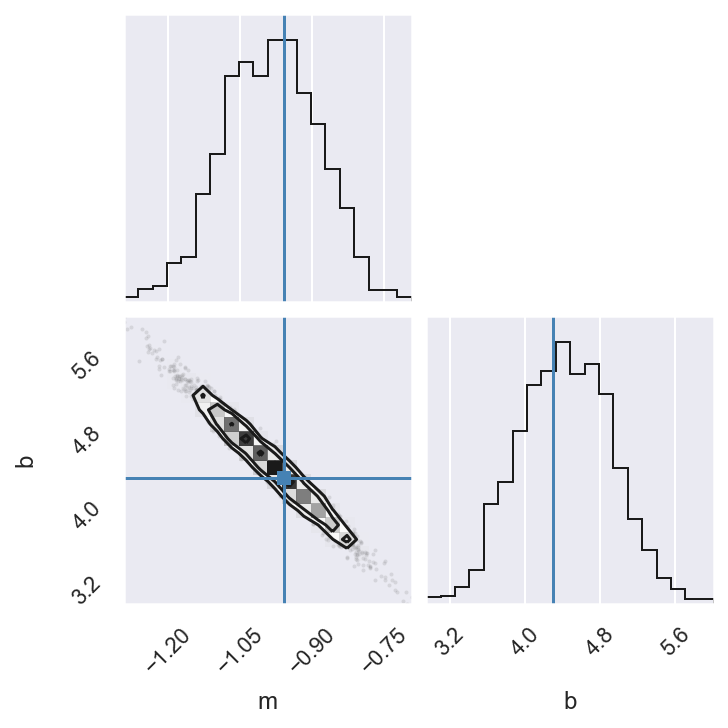

In [39]:
# flatten the parameters from all chains
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
labels = ["m", "b"]
# present the fitting results
from IPython.display import display, Math
for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))
    
print(m_true, b_true)
# visualize the PDFs of parameters
import corner # a python package for making corner plots, https://corner.readthedocs.io/en/latest/
fig = corner.corner(flat_samples, labels=labels, truths=[m_true, b_true]);

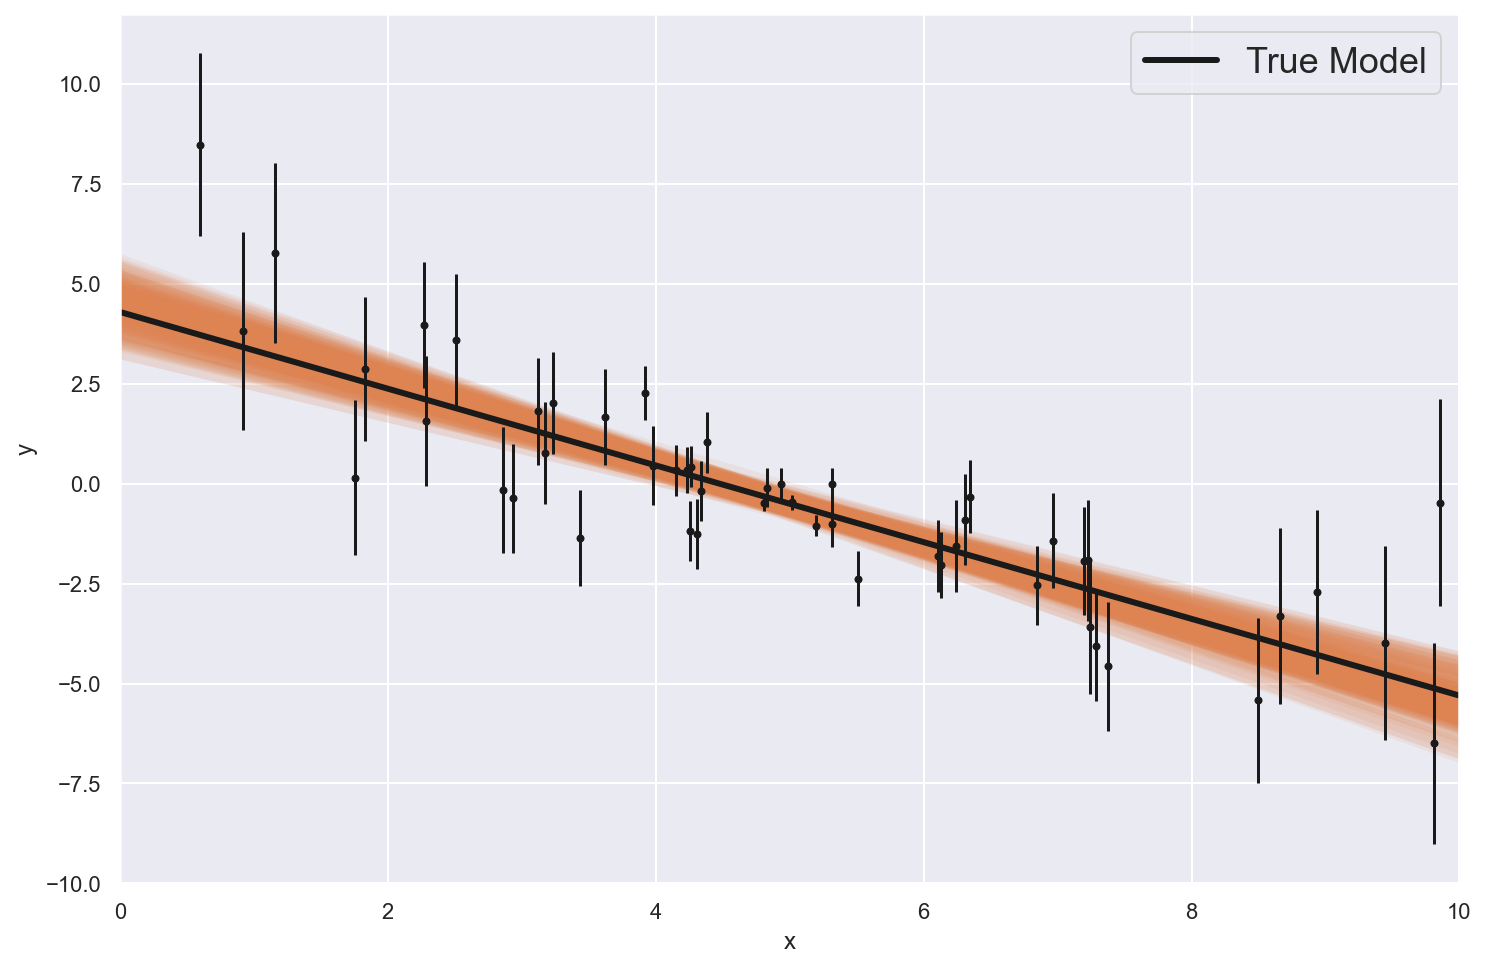

In [40]:
# subsample the parameters
inds = np.random.randint(len(flat_samples), size=100)
# visualize the distribution of the models
pl.figure(figsize=(12, 8))
for ind in inds:
    sample = flat_samples[ind]
    pl.plot(x0, sample[0] * x0 + sample[1], "C1-", lw=10,  alpha=0.1)
pl.plot(x0, m_true * x0 + b_true, "k", lw=3, label="True Model")
pl.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0, zorder=3) # keep the errorbars on top of all
pl.legend(fontsize=18)
pl.xlim(0, 10)
pl.xlabel("x")
pl.ylabel("y");

## 2.4 Scikit-learn
A package for basic machine learning calculations in python, https://scikit-learn.org/stable/
- Simple and efficient tools for predictive data analysis
- Accessible to everybody, and reusable in various contexts
- Built on NumPy, SciPy, and matplotlib
- Open source, commercially usable - BSD license

Here is an example for classifying handwritten digits, which is the `Hello world!` in machine learning, with machine learning using Scikit-learn 
https://www.kaggle.com/c/digit-recognizer
http://yann.lecun.com/exdb/mnist/

In [ ]:
%matplotlib inline

import numpy as np
import pylab as pl
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

## Read in the data
data_dir = "./"
data_train = data_dir + 'MNIST_train.csv'
data_test = data_dir + 'MNIST_test.csv'

train = pd.read_csv(data_train)
test  = pd.read_csv(data_test)
target = train["label"]
train = train.drop("label",1)

## Visualize some images

pl.figure(figsize=(10,10))
for digit_num in range(0,64):
    pl.subplot(8,8,digit_num+1)
    grid_data = train.iloc[digit_num].values.reshape(28,28)  # reshape from 1d to 2d pixel array
    pl.imshow(grid_data, interpolation = "none", cmap = "bone_r")
    pl.xticks([])
    pl.yticks([])

## Visualize the number of class and counts in the datasets

pl.figure(figsize=(12,8))
sns.countplot(target, palette = 'icefire')
pl.title('NUmber of digit classes', fontsize=20)
pl.xlabel('Label', fontsize=20);
pl.ylabel('Count', fontsize=20);

## Random Forest

from sklearn.ensemble import RandomForestClassifier

# create training and validation sets
split_ratio = 0.8
trainX, validX, trainY, validY = train_test_split(train, target, 
                                                  test_size=(1.0-split_ratio), 
                                                  train_size=split_ratio, 
                                                  random_state=0)

# build a model
clf = RandomForestClassifier(n_estimators = 100, n_jobs=1, criterion="gini")

# fit the model
clf.fit(trainX, trainY)

# validate the model
validY_pred = clf.predict(validX)

# evaluate the model with the validation set
print("Accuracy: \n")
print(metrics.accuracy_score(y_true=validY, y_pred=validY_pred), "\n")
print("Confusion Matrix: \n")
pl.figure(figsize = (10,8.5))
sns.heatmap(metrics.confusion_matrix(y_true=validY, y_pred=validY_pred), annot=True);

# Homework: Can you save the results to FITS, or Pandas, or HDF5?

In [ ]:
# predict labels for the test set
results = clf.predict(test)
# save the results to file
np.savetxt('./RF_MNIST_results.csv', 
           np.c_[range(1,len(test)+1),results], 
           delimiter=',', 
           header = 'ImageId,Label', 
           comments = '', 
           fmt='%d')

In [ ]:
import numpy as np

# Compute outer product of vectors
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:
# [[ 4  5]
#  [ 8 10]
#  [12 15]]
print(np.reshape(v, (3, 1)) * w)

# Add a vector to each row of a matrix
x = np.array([[1,2,3], [4,5,6]])
# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:
# [[2 4 6]
#  [5 7 9]]
print(x + v)

# Add a vector to each column of a matrix
# x has shape (2, 3) and w has shape (2,).
# If we transpose x then it has shape (3, 2) and can be broadcast
# against w to yield a result of shape (3, 2); transposing this result
# yields the final result of shape (2, 3) which is the matrix x with
# the vector w added to each column. Gives the following matrix:
# [[ 5  6  7]
#  [ 9 10 11]]
print((x.T + w).T)
# Another solution is to reshape w to be a column vector of shape (2, 1);
# we can then broadcast it directly against x to produce the same
# output.
print(x + np.reshape(w, (2, 1)))

# Multiply a matrix by a constant:
# x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3), producing the
# following array:
# [[ 2  4  6]
#  [ 8 10 12]]
print(x * 2)